<a href="https://colab.research.google.com/github/Antika20/Sumbssion-Pengembang-Machine-Learning/blob/main/Submission_Akhir_ML_Pengembangan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link Dataset :
https://www.kaggle.com/datasets/nurnob101/rice-disease

In [1]:
# install kaggle package
!pip install -q kaggle

In [2]:
# upload kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"antikaorinda","key":"4eff175b8f61192de087d150bebd4735"}'}

In [3]:
# make directory and change permission
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [4]:
# download dataset, choose 'copy api command' from kaggle dataset
!kaggle datasets download -d nurnob101/rice-disease

100% 3.99G/3.99G [00:41<00:00, 45.3MB/s]
100% 3.99G/3.99G [00:41<00:00, 103MB/s] 


In [5]:
from zipfile import ZipFile
file_name = "/content/rice-disease.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("done")

done


In [13]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import zipfile,os,shutil
import matplotlib.pyplot as plt

In [7]:
base_dir = '/content/Data-image'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')

Gudi_dir = os.path.join('/content/Data-image/Gudi_rotten')
apex_dir = os.path.join('/content/Data-image/apex_blast')
blast_dir = os.path.join('/content/Data-image/leaf_blast')
burn_dir = os.path.join('/content/Data-image/leaf_burn')
paddy_dir = os.path.join('/content/Data-image/neck_blast_paddy')

In [8]:
print('total training gudi images ',len(os.listdir(Gudi_dir)))

print('total training apex images ',len(os.listdir(apex_dir)))

print('total training leaf Blast images ',len(os.listdir(blast_dir)))

print('total training leaf Burn images ',len(os.listdir(burn_dir)))

print('total training nect Blast Paddy images ',len(os.listdir(paddy_dir)))

total training gudi images  500
total training apex images  500
total training leaf Blast images  500
total training leaf Burn images  500
total training nect Blast Paddy images  500


In [9]:
# Menghitung jumlah gambar pada dataset
number_label = {}
total_files = 0
for i in os.listdir(base_dir):
    counting = len(os.listdir(os.path.join(base_dir, i)))
    number_label[i] = counting
    total_files += counting

    print("Total Files : " + str(total_files))

Total Files : 500
Total Files : 1000
Total Files : 1500
Total Files : 2000
Total Files : 2500


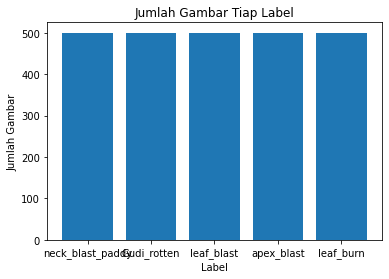

In [14]:
# Visualisasi jumlah gambar tiap kelas

plt.bar(number_label.keys(), number_label.values());
plt.title("Jumlah Gambar Tiap Label");
plt.xlabel('Label');
plt.ylabel('Jumlah Gambar');

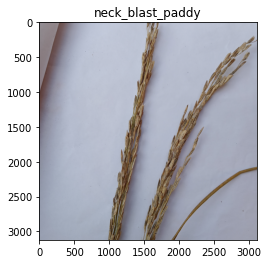

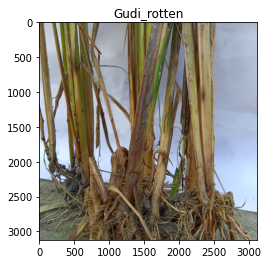

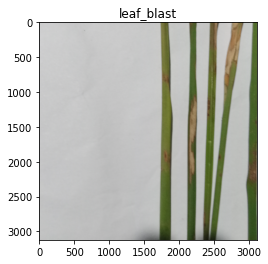

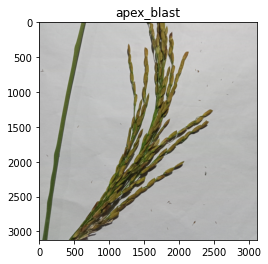

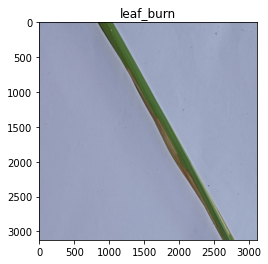

In [15]:
# Menampilkan sampel gambar tiap kelas
import matplotlib.image as mpimg

img_each_class = 1
img_samples = {}
classes = list(number_label.keys())


for c in classes:
    temp = os.listdir(os.path.join(base_dir, c))[:img_each_class]
    for item in temp:
        img_path = os.path.join(base_dir, c, item)
        img_samples[c] = img_path

for i in img_samples:
    fig = plt.gcf()
    img = mpimg.imread(img_samples[i])
    plt.title(i)
    plt.imshow(img)
    plt.show()

In [16]:
os.mkdir(train_dir)
os.mkdir(validation_dir) # Buat direktori Train dan val baru

In [17]:
train_gudi = os.path.join(train_dir, 'gudi')
train_apex = os.path.join(train_dir, 'apex')
train_blast = os.path.join(train_dir, 'blast')
train_burn = os.path.join(train_dir, 'burn')
train_paddy = os.path.join(train_dir, 'paddy')

val_gudi = os.path.join(validation_dir, 'gudi')
val_apex = os.path.join(validation_dir, 'apex')
val_blast = os.path.join(validation_dir, 'blast')
val_burn = os.path.join(validation_dir, 'burn')
val_paddy = os.path.join(validation_dir, 'paddy')

In [18]:
os.mkdir(train_gudi)
os.mkdir(train_apex)
os.mkdir(train_blast)
os.mkdir(train_burn)
os.mkdir(train_paddy)

os.mkdir(val_gudi)
os.mkdir(val_apex)
os.mkdir(val_blast)
os.mkdir(val_burn)
os.mkdir(val_paddy)

In [20]:
# memecah setiap direktori menjadi data train dan data validasi(validation 40% of dataset)
train_gudi_dir, val_gudi_dir = train_test_split(os.listdir(Gudi_dir), test_size = 0.20)
train_apex_dir, val_apex_dir = train_test_split(os.listdir(apex_dir), test_size = 0.20)
train_blast_dir, val_blast_dir = train_test_split(os.listdir(blast_dir), test_size = 0.20)
train_burn_dir, val_burn_dir = train_test_split(os.listdir(burn_dir), test_size = 0.20)
train_paddy_dir, val_paddy_dir = train_test_split(os.listdir(paddy_dir), test_size = 0.20)

In [21]:
for file in train_gudi_dir:
  shutil.copy(os.path.join(Gudi_dir, file), os.path.join(train_gudi, file))
for file in train_apex_dir:
  shutil.copy(os.path.join(apex_dir,file), os.path.join(train_apex,file))
for file in train_blast_dir:
  shutil.copy(os.path.join(blast_dir,file), os.path.join(train_blast,file))
for file in train_burn_dir:
  shutil.copy(os.path.join(burn_dir,file), os.path.join(train_burn,file))
for file in train_paddy_dir:
  shutil.copy(os.path.join(paddy_dir,file), os.path.join(train_paddy,file))


for file in val_gudi_dir:
  shutil.copy(os.path.join(Gudi_dir, file), os.path.join(val_gudi,file))
for file in val_apex_dir:
  shutil.copy(os.path.join(apex_dir,file), os.path.join(val_apex,file))
for file in val_blast_dir:
  shutil.copy(os.path.join(blast_dir,file), os.path.join(val_blast,file))
for file in val_burn_dir:
  shutil.copy(os.path.join(burn_dir,file), os.path.join(val_burn,file))
for file in val_paddy_dir:
  shutil.copy(os.path.join(paddy_dir,file), os.path.join(val_paddy,file))

In [22]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 30,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest',
)

test_datagen = ImageDataGenerator(
    rescale = 1./225,
)

In [23]:
training_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200,200),
    batch_size= 32,
    class_mode='categorical'
)

validasi_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (200,200),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 2000 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [31]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'), # membuat model Cnn nya 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
  
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [32]:
model.summary() # untuk melihat arsiteksur model CNN 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 198, 198, 128)     3584      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 99, 99, 128)      0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 99, 99, 128)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 97, 97, 128)       147584    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 48, 48, 128)      0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 48, 48, 128)      

In [33]:
from PIL import Image

for image_address in os.listdir(Gudi_dir):
     try:
        Image.open(os.path.join(Gudi_dir, image_address))
     except:
          print('Error occur on ' + image_address)

In [34]:
# Penggunaan Callback mencegah overfitting dan menghentikan training setelah akurasi terpenuhi
class CNNCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.92 and logs.get('val_accuracy')>0.92):
      print("\nAkurasi di atas 92%, hentikan training nya Sekarang yaaa!")
      self.model.stop_training = True

callbacks = CNNCallback()

In [35]:
# compile model dengan 'adam' optimizer loss function 'categorical_crossentropy' 
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [41]:
history = model.fit(
    training_generator,
    steps_per_epoch = 25, # 1312 images = batch_size * steps
    epochs = 20,
    validation_data = validasi_generator,
    validation_steps = 5, # 876 images = batch_size * steps
    verbose =1,
      callbacks=[callbacks],
    
)

Epoch 1/20
25/25 [==============================] - 377s 14s/step - loss: 0.1680 - accuracy: 0.9325 - val_loss: 0.3917 - val_accuracy: 0.8750
Epoch 2/20
25/25 [==============================] - 358s 14s/step - loss: 0.1243 - accuracy: 0.9563 - val_loss: 0.3713 - val_accuracy: 0.8938
Epoch 3/20
25/25 [==============================] - ETA: 0s - loss: 0.1396 - accuracy: 0.9541 
Akurasi di atas 92%, hentikan training nya Sekarang yaaa!
25/25 [==============================] - 368s 15s/step - loss: 0.1396 - accuracy: 0.9541 - val_loss: 0.2921 - val_accuracy: 0.9250


In [43]:
test_score = model.evaluate_generator( validasi_generator)
print("[INFO] accuracy validasi: {:.2f}%".format(test_score[1] * 100))
print("[INFO] Loss validasi: ",test_score[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[INFO] accuracy: 91.20%
[INFO] Loss:  0.30230408906936646


In [44]:
test_score = model.evaluate_generator( training_generator)
print("[INFO] accuracy training: {:.2f}%".format(test_score[1] * 100))
print("[INFO] Loss training: ",test_score[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[INFO] accuracy: 95.95%
[INFO] Loss:  0.12117277830839157


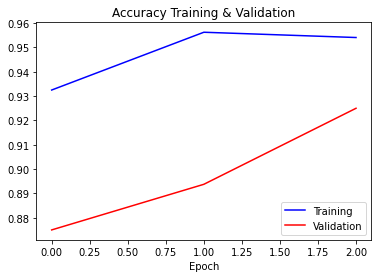

In [45]:
plt.plot(history.history['accuracy'], label='Training', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation', color='red')
plt.title('Accuracy Training & Validation')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

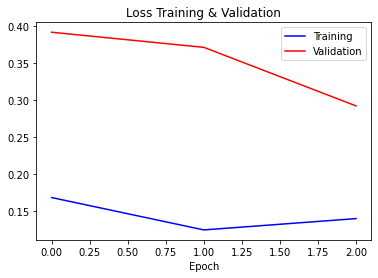

In [46]:
plt.plot(history.history['loss'], label='Training', color='blue')
plt.plot(history.history['val_loss'], label='Validation', color='red')
plt.title('Loss Training & Validation')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

Saving rice3.jpg to rice3.jpg
ini Penyakit Apex Blast


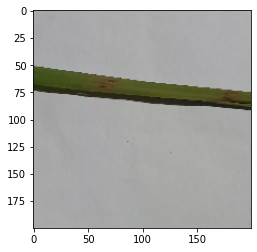

In [73]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():

  
 
   # predicting images
  path = fn
  img = image.load_img(path, target_size=(200,200))
 
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
 
  classes = model.predict(images, batch_size=10) 
  if classes[0,0]!=0:
    print('ini Penyakit Gudi Rotten')
  elif classes[0,1]!=0:
    print('ini Penyakit Apex Blast')
  elif classes[0,2]!=0:
    print('ini Penyakit Leaf Blast')
  elif classes[0,3]!=0:
    print('ini Penyakit Leaf Burn ')
  else:
    print('ini Penyakit Next Blast Paddy ')

In [50]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

In [52]:
# Defining list with labels
labels = ['gudi rotten','apex blast','leaf blast','leaf burn', 'paddy']


# Check point
# Showing labels
print(labels)

['gudi rotten', 'apex blast', 'leaf blast', 'leaf burn', 'paddy']


In [54]:
# Generating Numpy array with True classes' indexes
y_true = np.random.randint(low=0, high=5, size=100, dtype=int)


# Check point
# Shwoing array
print(y_true)

[0 0 1 2 2 4 2 4 3 1 4 0 3 2 4 2 2 0 1 0 3 4 2 0 2 4 4 4 1 1 3 1 4 3 4 4 1
 2 1 0 2 4 1 4 4 1 2 3 3 2 1 1 3 0 3 3 1 4 1 2 2 2 1 1 3 0 0 2 3 3 0 4 3 1
 3 3 0 2 0 1 2 4 0 0 2 4 1 1 4 2 2 0 4 3 2 1 1 1 2 4]


In [55]:
# Calculating number of samples for every class
# Iterating all classes' indexes in 'y_true' array
# Using Numpy function 'unique'
# Returning sorted unique elements and their frequencies
classesIndexes, classesFrequency = np.unique(y_true, return_counts=True)


# Printing frequency (number of samples) for every class
print('classes indexes:' , classesIndexes)
print('\n')
print('classes frequency:', classesFrequency)

classes indexes: [0 1 2 3 4]


classes frequency: [16 23 23 17 21]


In [60]:
# Making copy of array with True classes' indexes
y_predicted = np.copy(y_true)

In [61]:
# Choosing randomly 25% of classes to be changed
ii = np.random.randint(low=0, high=len(y_true), size=int(0.25 * len(y_true)), dtype=int)


# Check point
# Showing chosen indexes
print(ii)

[70 46  6 63  7 51 80 83 84 56 82 44 54 17 85 67  1 85 36 13 61 54 71 32
 61]


In [62]:
# Iterating chosen indexes and replacing them with other classes' indexes
for i in ii:
    # Generating new class index
    y_predicted[i] = np.random.randint(low=0, high=5, dtype=int)
    
    
    # Check point
    # Showing difference between True classes' indexes and Predicted ones
    print('index = {0:2d}, True class => {1}, {2} <= Predicted class'.
          format(i, y_true[i], y_predicted[i]))

index = 70, True class => 0, 1 <= Predicted class
index = 46, True class => 2, 1 <= Predicted class
index =  6, True class => 2, 3 <= Predicted class
index = 63, True class => 1, 0 <= Predicted class
index =  7, True class => 4, 0 <= Predicted class
index = 51, True class => 1, 2 <= Predicted class
index = 80, True class => 2, 3 <= Predicted class
index = 83, True class => 0, 3 <= Predicted class
index = 84, True class => 2, 2 <= Predicted class
index = 56, True class => 1, 0 <= Predicted class
index = 82, True class => 0, 3 <= Predicted class
index = 44, True class => 4, 1 <= Predicted class
index = 54, True class => 3, 3 <= Predicted class
index = 17, True class => 0, 1 <= Predicted class
index = 85, True class => 4, 0 <= Predicted class
index = 67, True class => 2, 2 <= Predicted class
index =  1, True class => 0, 4 <= Predicted class
index = 85, True class => 4, 3 <= Predicted class
index = 36, True class => 1, 3 <= Predicted class
index = 13, True class => 2, 2 <= Predicted class


In [63]:
# Confusion Matrix is a two dimensional matrix that visualizes the performance,
# and makes it easy to see confusion between classes,
# by providing a picture of interrelation

# Each row represents a number of actual, True class
# Each column represents a number of predicted class


# Computing Confusion Matrix to evaluate accuracy of classification
c_m = confusion_matrix(y_true, y_predicted)

# Showing Confusion Matrix in form of 2D Numpy array
print(c_m)

[[11  2  0  2  1]
 [ 2 19  1  1  0]
 [ 0  2 19  2  0]
 [ 1  0  0 16  0]
 [ 1  2  0  2 16]]


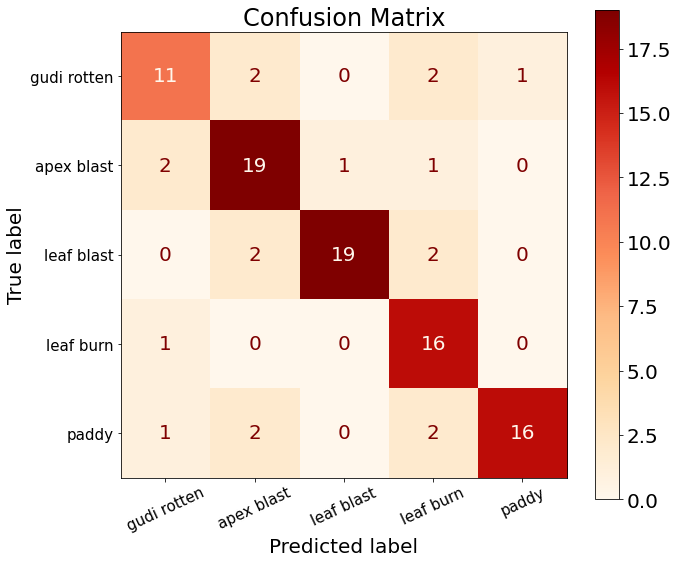

In [64]:

%matplotlib inline


# Setting default size of the plot
# Setting default fontsize used in the plot
plt.rcParams['figure.figsize'] = (10.0, 9.0)
plt.rcParams['font.size'] = 20


# Implementing visualization of Confusion Matrix
display_c_m = ConfusionMatrixDisplay(c_m, display_labels=labels)


# Plotting Confusion Matrix
# Setting colour map to be used
display_c_m.plot(cmap='OrRd', xticks_rotation=25)
# Other possible options for colour map are:
# 'autumn_r', 'Blues', 'cool', 'Greens', 'Greys', 'PuRd', 'copper_r'


# Setting fontsize for xticks and yticks
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


# Giving name to the plot
plt.title('Confusion Matrix', fontsize=24)


# Saving plot
plt.savefig('confusion_matrix.png', transparent=True, dpi=500)


# Showing the plot
plt.show()

In [65]:
# Showing the main classification metrics
print(classification_report(y_true, y_predicted))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71        16
           1       0.76      0.83      0.79        23
           2       0.95      0.83      0.88        23
           3       0.70      0.94      0.80        17
           4       0.94      0.76      0.84        21

    accuracy                           0.81       100
   macro avg       0.82      0.81      0.81       100
weighted avg       0.83      0.81      0.81       100



In [74]:
import pathlib
# Menyimpan model dalam format SavedModel
export_dir = 'saved_model/'
tf.saved_model.save(model, export_dir)
 
# Convert SavedModel menjadi Rice Deseased.tflite
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()
 
tflite_model_file = pathlib.Path('Rice_Desease.tflite')
tflite_model_file.write_bytes(tflite_model)

1871896